In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
# Load cleaned data
df = pd.read_csv(r"C:\Users\tanzi\Personal Projects\cold_start_project_498r\data\clean_data.csv")

In [3]:
# Aggregate by hour, dayofweek, time bucket
agg_df = df.groupby(['hour', 'dayofweek']).agg(
    total_invocations=('Cold_Start', 'count'),
    cold_starts=('Cold_Start', 'sum'),
    avg_delay=('Delay (s)', 'mean')
).reset_index()
agg_df['cold_start_ratio'] = agg_df['cold_starts'] / agg_df['total_invocations']

In [4]:
# Select features
features = ['cold_start_ratio', 'avg_delay']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(agg_df[features].dropna())
agg_df = agg_df.dropna().reset_index(drop=True)

In [5]:
# Elbow Method
inertias = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertias.append(km.inertia_)

c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

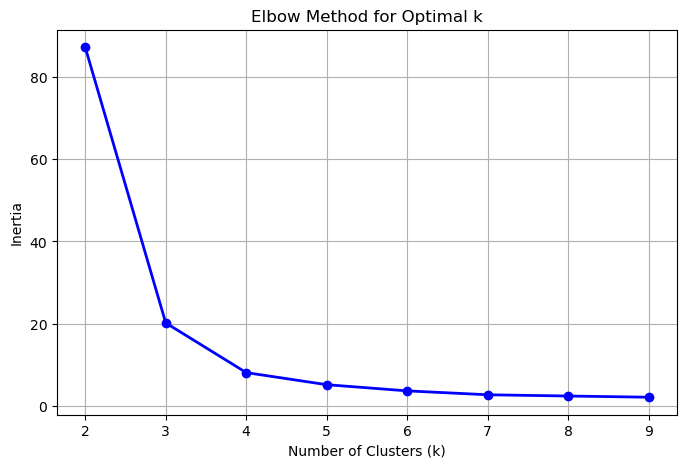

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [7]:
# Silhouette Scores
silhouette_scores = []
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

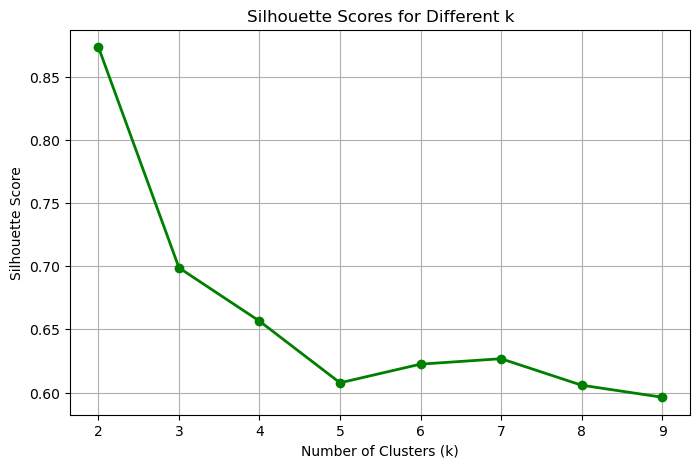

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()


In [9]:

# Use optimal k from above (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
agg_df['kmeans_cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Optional rename for consistent plotting
agg_df['cluster'] = agg_df['kmeans_cluster']

In [11]:
# Optional rename for consistent plotting
agg_df['cluster'] = agg_df['kmeans_cluster']

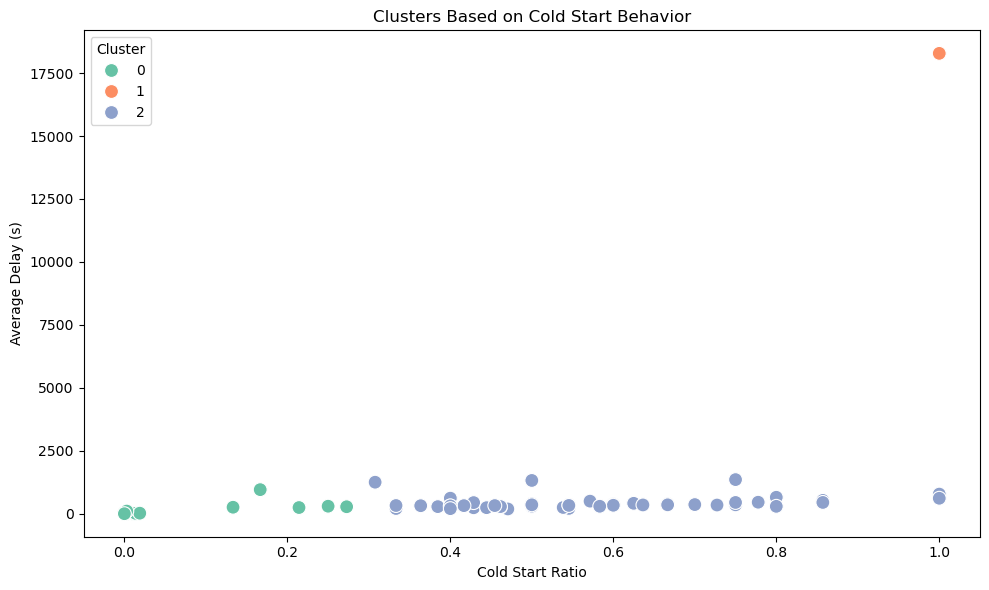

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df, x='cold_start_ratio', y='avg_delay', hue='cluster', palette='Set2', s=100)
plt.title('Clusters Based on Cold Start Behavior')
plt.xlabel('Cold Start Ratio')
plt.ylabel('Average Delay (s)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("fig_cluster_scatter.png")
plt.show()


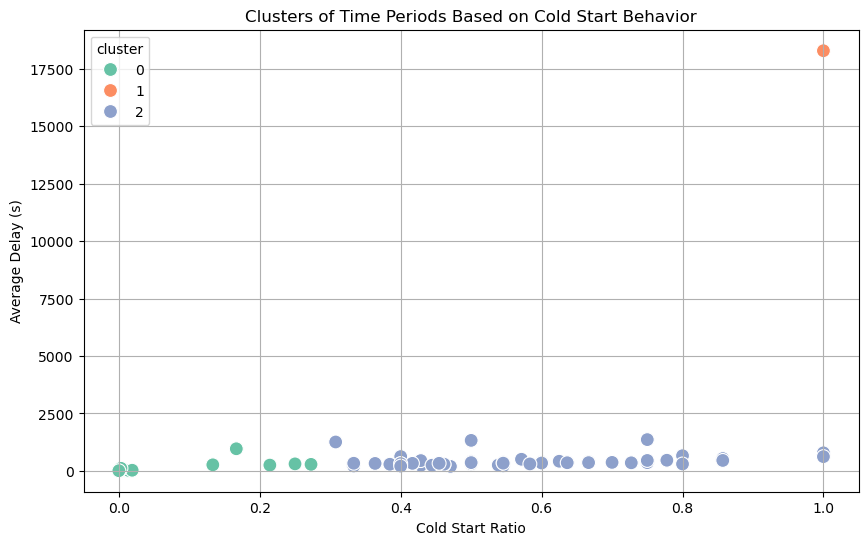

In [13]:
# Cluster Visualization (cold start ratio vs delay)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df, x='cold_start_ratio', y='avg_delay', hue='cluster', palette='Set2', s=100)
plt.title("Clusters of Time Periods Based on Cold Start Behavior")
plt.xlabel("Cold Start Ratio")
plt.ylabel("Average Delay (s)")
plt.grid(True)
plt.show()

In [14]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
agg_df['pc1'] = pca_components[:, 0]
agg_df['pc2'] = pca_components[:, 1]

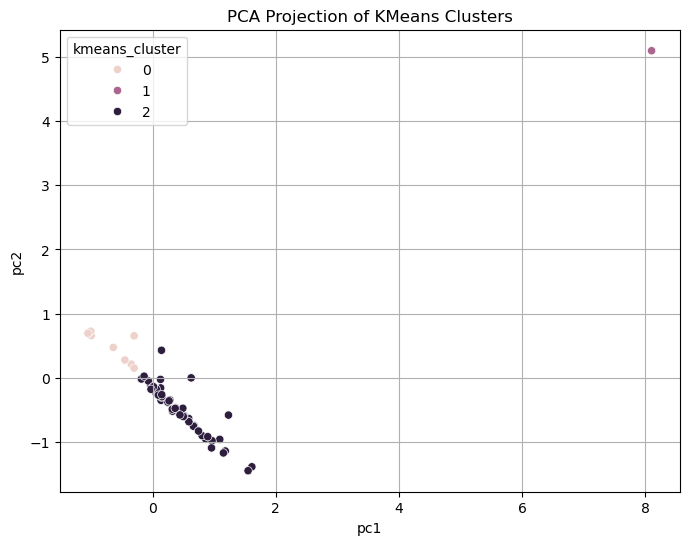

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=agg_df, x='pc1', y='pc2', hue='kmeans_cluster')
plt.title("PCA Projection of KMeans Clusters")
plt.grid(True)
plt.show()

In [16]:
# t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=15, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)
agg_df['tsne_1'] = tsne_components[:, 0]
agg_df['tsne_2'] = tsne_components[:, 1]

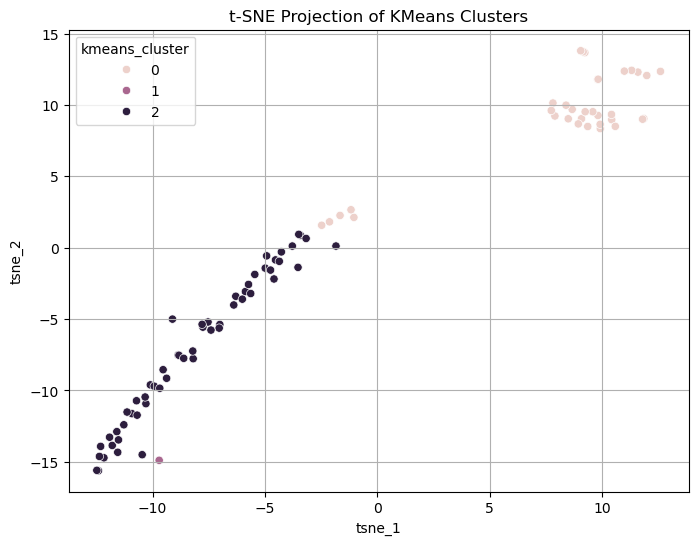

In [17]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=agg_df, x='tsne_1', y='tsne_2', hue='kmeans_cluster')
plt.title("t-SNE Projection of KMeans Clusters")
plt.grid(True)
plt.show()

In [18]:
# Save result
agg_df.to_csv("../data/clustered_time_patterns.csv", index=False)